In [16]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

class Data:
    """ A util class to store the training and test datasets. """
    
    def __init__(self, tr_explanatory: pd.DataFrame, tr_explained: pd.DataFrame, 
                test_explanatory: pd.DataFrame, test_explained: pd.DataFrame):
        
        self.tr_explanatory = tr_explanatory
        self.tr_explained = tr_explained
        self.test_explanatory = test_explanatory
        self.test_explained = test_explained
    
    def consistency_check(self):
        print("Shape EXPLANATORY (Training set): {}".format(self.tr_explanatory.shape))
        print("Shape EXPLAINED (Training set): {}".format(self.tr_explained.shape))
        print("Shape EXPLANATORY (Test set): {}".format(self.test_explanatory.shape))
        print("Shape EXPLAINED (Test set): {}".format(self.test_explained.shape))
        
        if self.tr_explanatory.shape[0] == self.tr_explained.shape[0] and \
            self.test_explanatory.shape[0] == self.test_explained.shape[0] and \
            self.tr_explanatory.shape[1] == self.test_explanatory.shape[1] :
            print("Consistent dimensions.")
            return True
        else:
            print("ERROR: Inconsistent dimensions!")
            print(self.tr_explanatory.shape[0] == self.tr_explained.shape[0])
            print(self.test_explanatory.shape[0] == self.test_explained.shape[0])
            print(self.tr_explanatory.shape[1] == self.test_explanatory.shape[1])
            return False 

In [17]:
#Load CSV file
data = pd.read_csv('../shuffle_email_spam_classification.csv')

In [18]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


(  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
 0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
 1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
 2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
 3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
 4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
 
    valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
 0       0    0               0         0         0   0    0           0  
 1       0    0               0         0         0   1    0           0  
 2       0    0               0         0         0   0    0           0  
 3       0    0               0         0         0   0    0           0  
 4       0    0               0         0         0   1    0           0  
 
 [5 rows x 3002 columns],
 None)

In [19]:
#Preprocessing
# Step 1: Remove the "Email No." column and change 0's to -1 in the "Prediction" column
data["Prediction"] = data["Prediction"].apply(lambda x: -1 if x == 0 else 1)
data_cleaned = data.drop(columns=["Email No."])
data_cleaned = data_cleaned.sample(frac=1).reset_index(drop=True)
n = data_cleaned.shape[0]
thr = math.floor(0.75 * n)

X_train = data_cleaned.iloc[:thr, :-1]
Y_train = data_cleaned.iloc[:thr, -1]
X_test = data_cleaned.iloc[thr:, :-1]
Y_test = data_cleaned.iloc[thr:, -1]

#Data object
yy = Data(X_train, Y_train, X_test, Y_test)

yy.consistency_check()

Shape EXPLANATORY (Training set): (3879, 3000)
Shape EXPLAINED (Training set): (3879,)
Shape EXPLANATORY (Test set): (1293, 3000)
Shape EXPLAINED (Test set): (1293,)
Consistent dimensions.


True

In [20]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression with increased max_iter and solver
logreg = LogisticRegression(max_iter=500, solver='lbfgs')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(yy.tr_explanatory)
X_test_scaled = scaler.transform(yy.test_explanatory)

# Fit the model
logreg.fit(X_train_scaled, yy.tr_explained)

#Predict the fitted data
predictions_LR = logreg.predict(X_test_scaled)

print("All predictions: {0} \n\n\n".format(predictions_LR))
pred_vs_actual_LR_df = pd.DataFrame({
    "LogPredict": predictions_LR,
    "Actual": yy.test_explained
})

# pred_vs_actual_LR_df = pd.DataFrame(X_test_scaled, columns=[f'Feature_{i+1}' for i in range(X_test_scaled.shape[1])])
# pred_vs_actual_LR_df['LogPredict'] = predictions_LR
# pred_vs_actual_LR_df['Actual'] = yy.test_explained

print(pred_vs_actual_LR_df)
# X, Y = make_classification(random_state=42)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, Y_train)  # apply scaling on training data
# pipe.score(X_test, Y_test) 


All predictions: [-1  1 -1 ... -1 -1 -1] 



      LogPredict  Actual
3879          -1      -1
3880           1       1
3881          -1      -1
3882          -1      -1
3883          -1      -1
...          ...     ...
5167          -1      -1
5168           1       1
5169          -1      -1
5170          -1      -1
5171          -1      -1

[1293 rows x 2 columns]


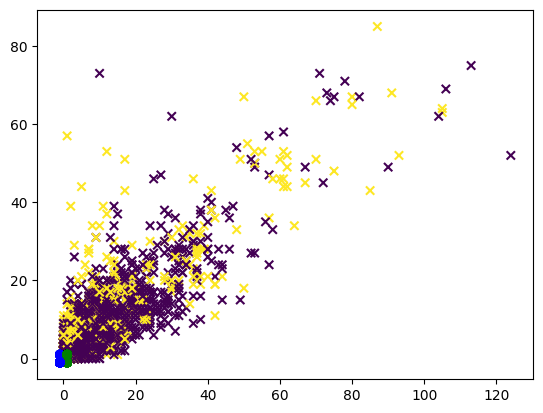

In [21]:
import matplotlib.pyplot as plt
# Visualize both the Training and the Test set
plt.scatter(yy.tr_explanatory.iloc[:, 0], yy.tr_explanatory.iloc[:, 1], c = yy.tr_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_LR_df['CLass-Color'] = pred_vs_actual_LR_df['LogPredict'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_LR_df.iloc[:, 0], 
    pred_vs_actual_LR_df.iloc[:, 1], 
    c=pred_vs_actual_LR_df["CLass-Color"], 
    marker="o")

plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_LR = confusion_matrix(yy.test_explained, predictions_LR)
print("Confusion matrix: \n{}".format(confusion_mtx_LR))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_LR, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_LR, output_dict=False))

Confusion matrix: 
[[874  32]
 [ 15 372]]

#####   Accuracy: 96.36504253673627 %   ##### 



              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       906
           1       0.92      0.96      0.94       387

    accuracy                           0.96      1293
   macro avg       0.95      0.96      0.96      1293
weighted avg       0.96      0.96      0.96      1293



In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize
naive_bayes = GaussianNB()

# ################################################
# Fit the model 
naive_bayes.fit(yy.tr_explanatory, yy.tr_explained)

# ################################################
# Predict new data instances
predictions_NB = naive_bayes.predict(yy.test_explanatory)


print("All predictions: {0} \n\n\n".format(predictions_NB))
pred_vs_actual_NB_df = yy.test_explanatory.copy()
pred_vs_actual_NB_df["ClassPredicted"] = predictions_NB
pred_vs_actual_NB_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_NB_df)

All predictions: [-1  1 -1 ... -1 -1 -1] 



      the  to  ect  and  for  of   a  you  hou  in  ...  jay  valued  lay  \
3879    6   5    4    2    0   9  57    3    1   0  ...    0       0    0   
3880    3   3    1    1    0   5  16    1    0   4  ...    0       0    0   
3881   12   8    6    4    5   1  74    2    3  12  ...    0       0    0   
3882    9   5    4    1    2   4  51    4    0  16  ...    0       0    0   
3883    9   7    1    4    4   3  35    1    0  15  ...    0       0    0   
...   ...  ..  ...  ...  ...  ..  ..  ...  ...  ..  ...  ...     ...  ...   
5167    4   5    7    1    0   0  41    3    3   1  ...    0       0    0   
5168    0   0    1    0    0   0   0    0    0   1  ...    0       0    0   
5169    1   0    1    0    0   0   6    0    0   0  ...    0       0    0   
5170    4  12    4    1    5   2  67   14    0   9  ...    0       0    0   
5171    1   1    1    0    1   0  10    0    1   1  ...    0       0    0   

      infrastructure  military

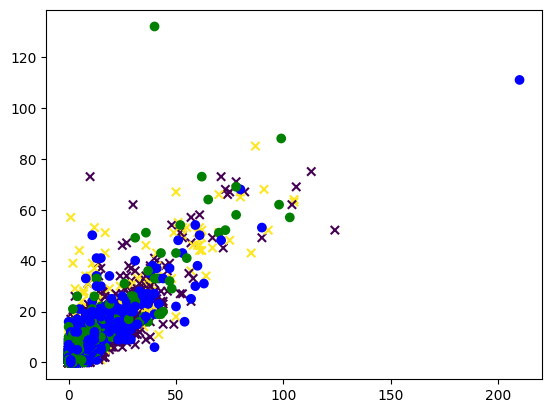

In [24]:
# Visualize both the Training and the Test set
plt.scatter(yy.tr_explanatory.iloc[:, 0], 
            yy.tr_explanatory.iloc[:, 1], 
            c = yy.tr_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_NB_df['CLass-Color'] = pred_vs_actual_NB_df['ClassPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_NB_df.iloc[:, 0], 
    pred_vs_actual_NB_df.iloc[:, 1], 
    c=pred_vs_actual_NB_df["CLass-Color"], 
    marker="o")

plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_NB = confusion_matrix(yy.test_explained, predictions_NB)
print("Confusion matrix: \n{}".format(confusion_mtx_NB))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_NB, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_NB, output_dict=False))

Confusion matrix: 
[[858  48]
 [ 11 376]]

#####   Accuracy: 95.4369682907966 %   ##### 



              precision    recall  f1-score   support

          -1       0.99      0.95      0.97       906
           1       0.89      0.97      0.93       387

    accuracy                           0.95      1293
   macro avg       0.94      0.96      0.95      1293
weighted avg       0.96      0.95      0.95      1293

